import libraries

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

data collecting and procesing

In [ ]:
data=pd.read_csv('heart_disease_data.csv')

In [ ]:
#show first 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#show last 5 rows
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
data.shape

(303, 14)

In [ ]:
check=data.info()
print(check)
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.value_counts('target')

,count
target,
1,165
0,138


data visualization

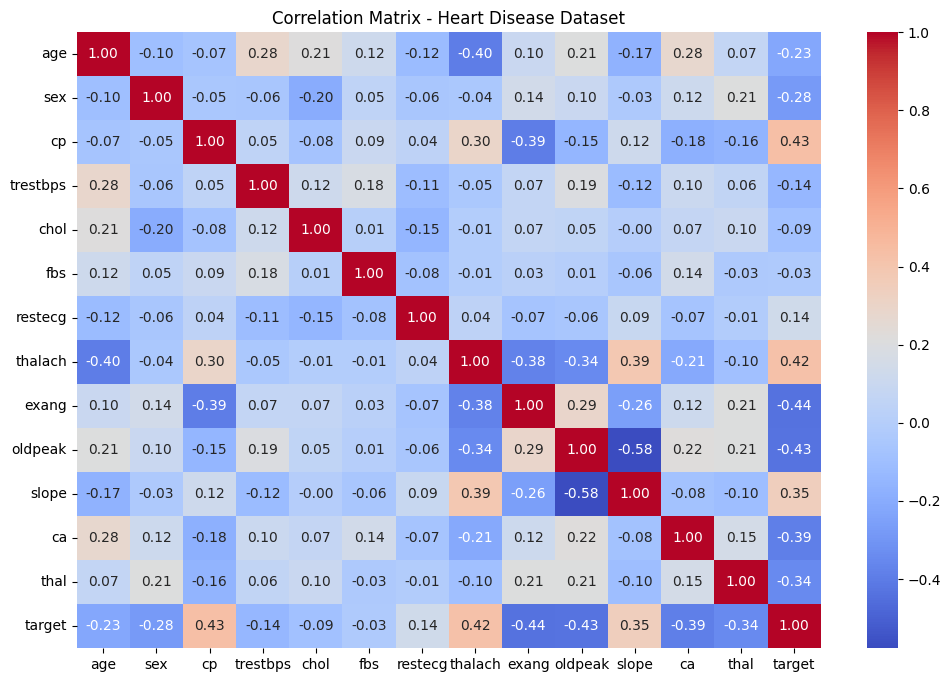

/tmp/ipython-input-3491790332.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=data, palette="viridis")


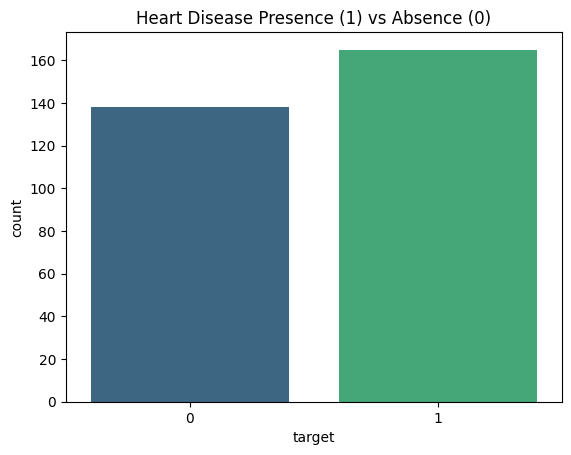

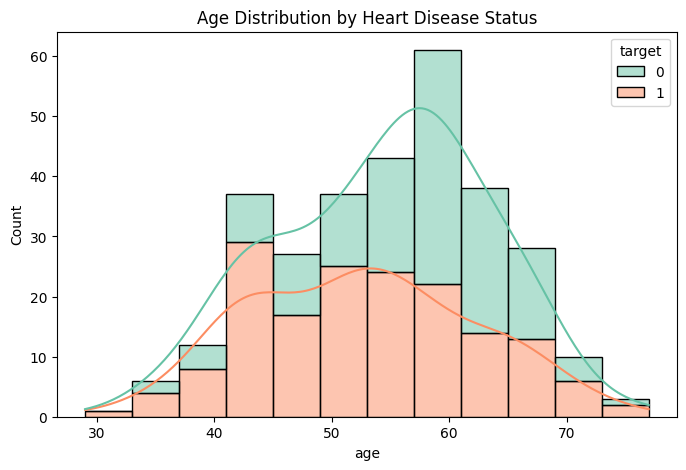

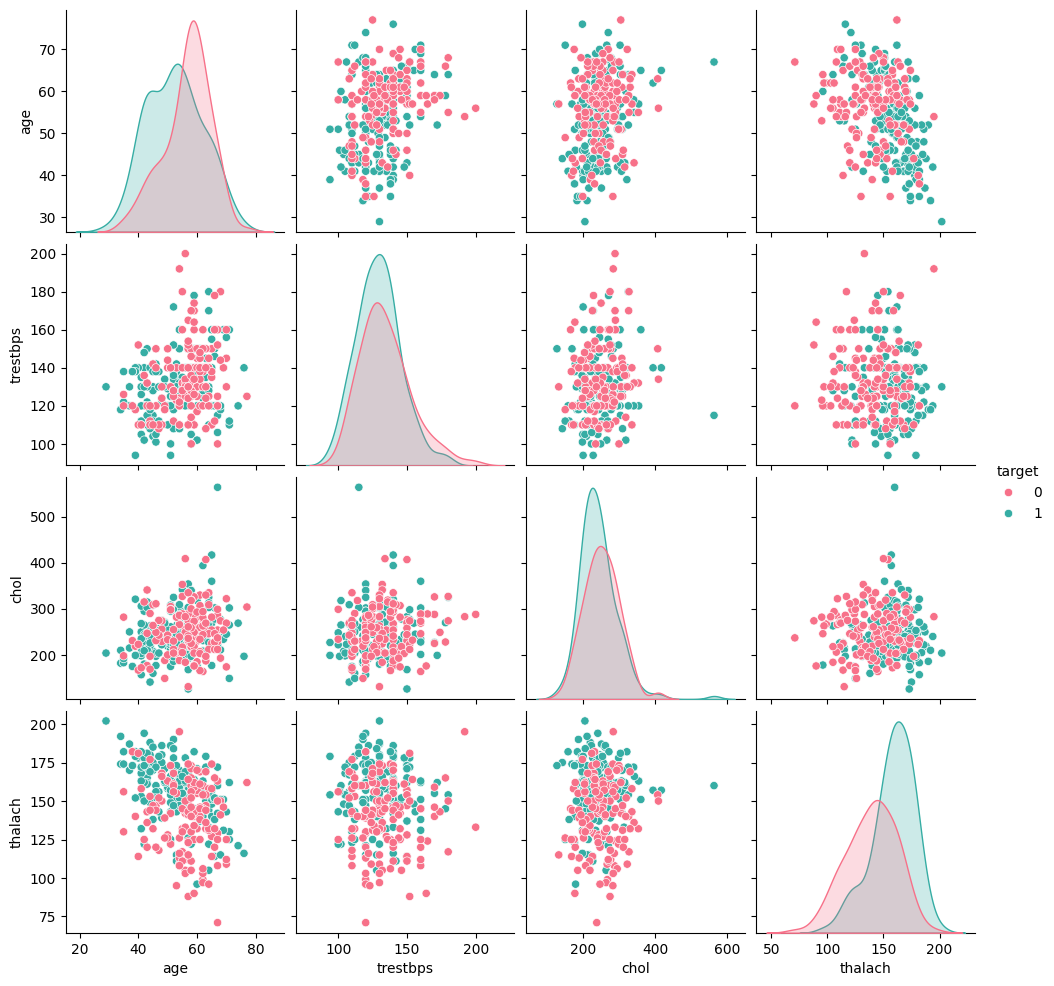

In [ ]:
# 4. Correlation matrix
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Heart Disease Dataset")
plt.show()

# 5. Distribution of target
sns.countplot(x="target", data=data, palette="viridis")
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()

# 6. Age distribution by target
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="age", hue="target", kde=True, multiple="stack", palette="Set2")
plt.title("Age Distribution by Heart Disease Status")
plt.show()

# 7. Pairplot for selected features
selected_features = ["age", "trestbps", "chol", "thalach", "target"]
sns.pairplot(data[selected_features], hue="target", palette="husl")
plt.show()


1 --> Defective Heart

0 --> Healthy Heart

splitting,feature data

In [ ]:
x=data.drop(columns='target',axis=1)
y=data['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
#scalling data
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [39]:
feature_selection=SelectFromModel(SVC(kernel='linear', C=0.01, random_state=42))
feature_selection.fit_transform(x_train,y_train)

# Access the selected features from the training data
selected_features_train = feature_selection.transform(x_train)
selected_features_test = feature_selection.transform(x_test)

# Now you can use selected_features_train and selected_features_test for training your model
# For example, to train a new SVC model with selected features:
# model_selected = SVC(kernel='linear', C=0.01, random_state=42)
# model_selected.fit(selected_features_train, y_train)
# print("Model trained with selected features.")

training the data

In [40]:
model=  SVC()
model.fit(x_train,y_train)

SVC()

In [41]:
#check model

X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"Accuracy of train: {training_data_accuracy:.4f}")

x_test_predict=model.predict(x_test)
data_accuracy=accuracy_score(x_test_predict,y_test)
print(f"Accuracy of test: {data_accuracy:.4f}")

y_scores = model.decision_function(x_test)  # raw scores
roc_auc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy of train: 0.8802
Accuracy of test: 0.8197
ROC AUC: 0.8885


In [42]:
import pickle
file_name='heart_disease.sav'
with open(file_name, 'wb') as f:
    pickle.dump(model, f)